In [101]:
from ragraph.io.esl import from_esl
graph = from_esl(["./esl"])

import raesl.plot
figure = raesl.plot.mdm(
    graph,
    node_kinds=["component"],
)
figure.write_image("figures/dsm_components.svg")
figure.show()


In [118]:
import ragraph.plot
# Visualizing the MDM.

# Extracting weights and assigning them to edges.
for e in graph.edges:
    for func in (
        e.annotations.get("esl_info", {})
        .get("reason", {})
        .get("relation_specifications", [])
    ):
        for weight in ["weight"]:
            e.weights[weight] = float(
                graph[func]
                .annotations.esl_info.get("tagged_comments", {})
                .get(weight, [0])[0]
            )

for n in graph.nodes:
    print(n.name, n.kind)

figure = raesl.plot.mdm(
    graph,
    depth=2,
    style=raesl.plot.Style(
        ragraph=ragraph.plot.Style(
            piemap=dict(
                display="weights",
                mode= "relative",
                fields=["weight"]
            ),
        )
    )
)

figure

real variable_type
integer variable_type
string variable_type
boolean variable_type
Temperature variable_type
Voltage variable_type
Frequency variable_type
Performance variable_type
DataRate variable_type
ProcessNode variable_type
Power variable_type
Area variable_type
Bandwidth variable_type
Length variable_type
BusWidth variable_type
Latency variable_type
Density variable_type
ThermalResistance variable_type
ThermalPower variable_type
CacheCapacity variable_type
HitRate variable_type
Count variable_type
Current variable_type
Mass variable_type
Energy variable_type
Massflowrate variable_type
HeatCapacity variable_type
TemperatureGradient variable_type
ThermalConductivity variable_type
Data variable_type
Percent variable_type
Associativity variable_type
BlockSize variable_type
world component
world.ambient-temperature variable
world.total-power-consumption variable
world.total-die-area variable
world.efficiency variable
world.core-power-consumption variable
world.core-max-power-consump

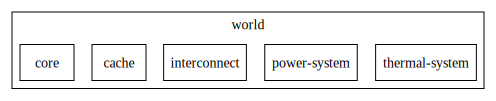

In [90]:
digraph = raesl.plot.functional_dependency_diagram(
    graph,
    root=graph["world"],
    levels=2,
)
digraph

In [91]:
figure = raesl.plot.mdm(
    graph,
    # node_kinds=["component", "variable", "function_spec", "design_spec", "relation_spec"],
    # edge_kinds=["functional_dependency", "mapping_dependency"],
    depth=2,
)
figure.write_image("figures/mdm.svg")
figure.show()

In [92]:
from ragraph.analysis import sequence
from raesl.plot.view_funcs import multi_domain
import ragraph.plot

# Select correct nodes and edges to be displayed.
nodes, edges = multi_domain(
    graph,
    depth=4
)

leaf_comps = [n for n in nodes if n.kind == "component"]
leaf_funcs = [n for n in nodes if n.kind == "function_spec"]
leaf_design = [n for n in nodes if n.kind == "design_spec"]
leaf_models = [n for n in nodes if n.kind == "relation_spec"]
leaf_vars = [n for n in nodes if n.kind == "variable"]

# Sequence functions.
_, _, sequenced_functions = sequence.utils.branchsort(algo=sequence.scc_tearing, graph=graph, algo_args=dict(inf=1, dep=1, mu=3), inplace=True, nodes=leaf_vars+leaf_models)

# Reload figure based on sequence.
figure = ragraph.plot.mdm(
    leafs = leaf_comps + sequenced_functions,
    edges = edges,
    style= ragraph.plot.Style(
        piemap=dict(
            display="labels",
            mode="relative",
            fields=graph.edge_labels
        ),
    )
)

figure.write_image("figures/mdm_sequenced.svg")
figure


In [93]:
from ragraph.analysis import cluster

nodes, edges = multi_domain(
    graph,
    depth=4
)


relations = [n for n in nodes if n.kind == "relation_spec"]
variables = [n for n in nodes if n.kind == "variable"]

# Cluster components
cluster.tarjans_scc(
    graph=graph,
    leafs = variables + relations,
)

# Reloaded MDM based on clustered graph.
figure = raesl.plot.mdm(
    graph,
    # node_kinds=["component", "variable", "function_spec", "design_spec", "relation_spec"],
    # edge_kinds=["functional_dependency", "mapping_dependency"],
    depth=10,
)
figure.write_image("figures/mdm_clustered.svg")
figure

In [94]:
from ragraph.analysis import sequence
from raesl.plot.view_funcs import multi_domain
import ragraph.plot

leaf_models = [n for n in nodes if n.kind == "relation_spec"]
leaf_vars = [n for n in nodes if n.kind == "variable"]

# Sequence functions.
_, _, sequenced_functions = sequence.utils.branchsort(algo=sequence.scc_tearing, graph=graph, algo_args=dict(inf=1, dep=1, mu=3), inplace=True, nodes=leaf_vars)

# Reload figure based on sequence.
figure = ragraph.plot.mdm(
    leafs = nodes,
    edges = edges,
    style= ragraph.plot.Style(
        piemap=dict(
            display="labels",
            mode="relative",
            fields=graph.edge_labels
        ),
    )
)

figure.write_image("figures/mdm_clustered_sequenced.svg")
figure